In [38]:
# For loading the dataframe
import pickle

# For loading data and data manipulation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

# For converting them into vectors
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

# Loading the datasets

In [39]:
df_predict = pickle.load(open("eda_data/predict.pkl", "rb"))
df_predict.head()

,Preferences,Category,Category_num,Preference_Clean
0,I’m more of a tea person 🍵$$$I prefer herbal/d...,decaf,16,tea person prefer herbal de caffeinated tea ch...
1,I’m more of a tea person 🍵$$$I prefer herbal/d...,sweet,3,tea person prefer herbal de caffeinated tea ch...
2,"I don’t drink coffee or tea 🤭$$$ Chocolates, C...",hard liquor,7,drink coffee tea chocolate candy baked treat s...
3,"I don’t drink coffee or tea 🤭$$$ Chocolates, C...",accessory,1,drink coffee tea chocolate candy baked treat s...
4,"I don’t drink coffee or tea 🤭$$$ Chocolates, C...",LiquorAccessory,0,drink coffee tea chocolate candy baked treat s...


# Split the data into train and test

In [40]:
X = df_predict['Preference_Clean']
y = df_predict['Category_num']

X.shape, y.shape

((3711,), (3711,))

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2968,), (743,), (2968,), (743,))

# Converting feature into vectors

In [42]:
tfidf = TfidfVectorizer(max_features=3000, stop_words='english')

In [43]:
X_train_vec = tfidf.fit_transform(X_train).toarray()
X_test_vec = tfidf.transform(X_test).toarray()

In [44]:
X_train_vec.shape

(2968, 584)

# Creating a logictic regression model

In [52]:
import tensorflow as tf

model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(10))
model.add(tf.keras.layers.Dense(10, activation='relu'))
model.add(tf.keras.layers.Dense(10, activation='relu'))
model.add(tf.keras.layers.Dense(1))

model.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
             optimizer=tf.keras.optimizers.Adam(),
             metrics=['mse'])

Epoch 1/10


2022-03-14 17:59:33.433497: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


93/93 [==============================] - 1s 7ms/step - loss: 5.0722e-07 - mse: 76.5688
Epoch 2/10
93/93 [==============================] - 1s 7ms/step - loss: 5.0722e-07 - mse: 76.5687
Epoch 3/10
93/93 [==============================] - 1s 7ms/step - loss: 5.0722e-07 - mse: 76.5687
Epoch 4/10
93/93 [==============================] - 1s 7ms/step - loss: 5.0722e-07 - mse: 76.5687
Epoch 5/10
93/93 [==============================] - 0s 5ms/step - loss: 5.0722e-07 - mse: 76.5687
Epoch 6/10
93/93 [==============================] - 0s 5ms/step - loss: 5.0722e-07 - mse: 76.5688
Epoch 7/10
93/93 [==============================] - 1s 7ms/step - loss: 5.0722e-07 - mse: 76.5687
Epoch 8/10
93/93 [==============================] - 1s 7ms/step - loss: 5.0722e-07 - mse: 76.5687
Epoch 9/10
93/93 [==============================] - 1s 8ms/step - loss: 5.0722e-07 - mse: 76.5687
Epoch 10/10
93/93 [==============================] - 1s 7ms/step - loss: 5.0722e-07 - mse: 76.5687


<AxesSubplot:>

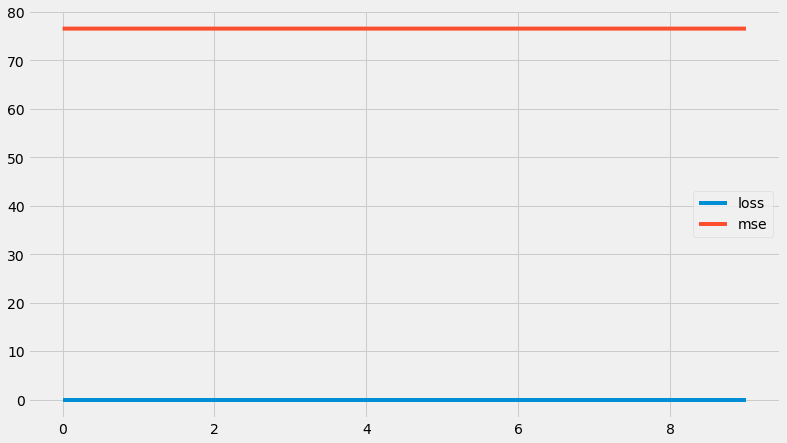

In [53]:
history = model.fit(X_train_vec, y_train, epochs=10)

pd.DataFrame(history.history).plot(figsize=(12,7))